<a href="https://colab.research.google.com/github/Tiasha-26/Assignments-code-/blob/main/LAB_ASSIGNMENT_2_I_(Solving%20numerically%20ODE%20and%20Integration).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

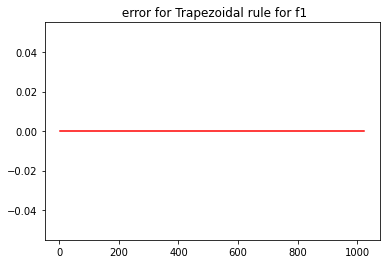

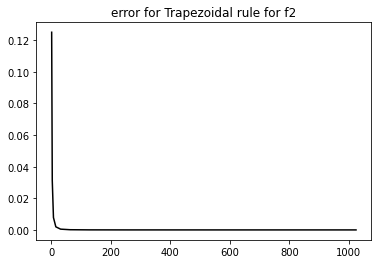

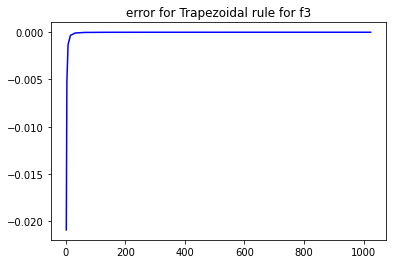

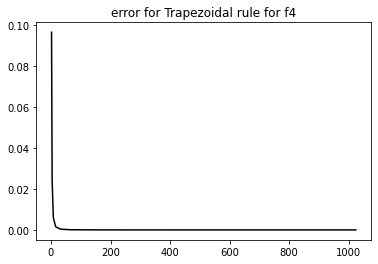

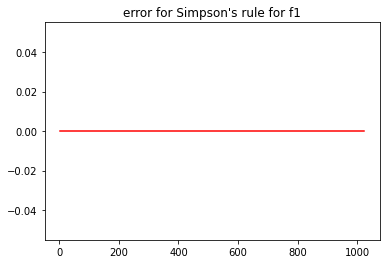

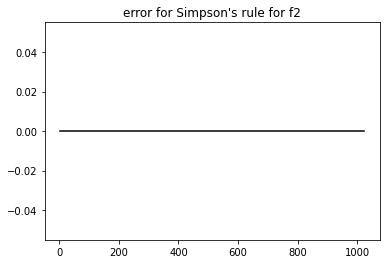

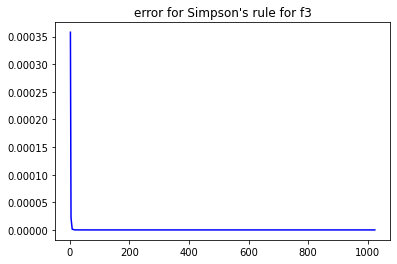

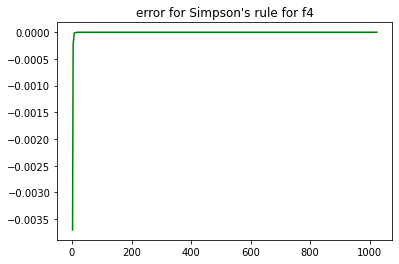

In [ ]:
#problem 2
import numpy as np
import matplotlib.pyplot as plt
def f1(c):       #function defining
  return c
def f2(c):
  return c**2
def f3(c):
  return np.sin(c)
def f4(c):
  return c*np.sin(c)
#trapezoidal rule formulation
def tpz(a,b,n,f):
  sum1=0

  dx=(b-a)/n
  for i in range(0,n+1):
    x=a+(i*dx)
    if (i==0 or i==n):
     sum1+=f(x)
    else:
      sum1+=2*f(x)

  return (dx/2)*(sum1)
#print(tpz(0,np.pi,6))
#simpson rule formulation

def simp(a,b,n,f):
  sum2=0
  h=(b-a)/n
  t=f(a)+f(b)
  d=4
  x=a
  while(x<b):
    x=x+h
    if(x!=b):
      sum2+=d*f(x)
      d=6-d
  return (h/3)*(t+sum2)
#print(simp(0,1,4,f3))
ana_f1=0.5
ana_f2=1/3
ana_f3=np.cos(0)-np.cos(1)
ana_f4=np.sin(1)-np.cos(1)

a_f1t=[]
a_f1s=[]
a_f2t=[]
a_f2s=[]
a_f3t=[]
a_f3s=[]
a_f4t=[]
a_f4s=[]
for i in range(1,11):
  n=2**i
  y1=tpz(0,1,n,f1)
  #print("Trapezoidal rule:",y)
  a_f1t.append((y1-ana_f1)/ana_f1)
  #print("Simpson rule:",simp(0,1,n,f2))
  y2=tpz(0,1,n,f2)
  a_f2t.append((y2-ana_f2)/ana_f2)
  y3=tpz(0,1,n,f3)
  a_f3t.append((y3-ana_f3)/ana_f3)
  y4=tpz(0,1,n,f4)
  a_f4t.append((y4-ana_f4)/ana_f4)
  z1=simp(0,1,n,f1)
  a_f1s.append((z1-ana_f1)/ana_f1)
  z2=simp(0,1,n,f2)
  a_f2s.append((z2-ana_f2)/ana_f2)
  z3=simp(0,1,n,f3)
  a_f3s.append((z3-ana_f3)/ana_f3)
  z4=simp(0,1,n,f4)
  a_f4s.append((z4-ana_f4)/ana_f4)
k=[]
for i in range(1,11):
  k.append(2**i)
plt.title(" error for Trapezoidal rule for f1")
plt.plot(k,a_f1t,color="r")
plt.show()
#plt.yscale("log")
#plt.savefig("error for Trapezoidal rule for f1.pdf")
plt.title("error for Trapezoidal rule for f2")
plt.plot(k,a_f2t,color="k")
plt.show()
#plt.yscale("log")
#plt.savefig("error for Trapezoidal rule for f2.pdf")
plt.title("error for Trapezoidal rule for f3")
plt.plot(k,a_f3t,color="b")
plt.show()
#plt.savefig("error for Trapezoidal rule for f3.pdf")
plt.title("error for Trapezoidal rule for f4")
plt.plot(k,a_f4t,color="k")
plt.show()
#plt.savefig("error for Trapezoidal rule for f4.pdf")

plt.title("error for Simpson's rule for f1")
plt.plot(k,a_f1s,color="r")
plt.show()
#plt.savefig("error for Simpson's rule for f1.pdf")
plt.title("error for Simpson's rule for f2")
plt.plot(k,a_f2s,color="k")
plt.show()
#plt.savefig("error for Simpson's rule for f2.pdf")
plt.title("error for Simpson's rule for f3")
plt.plot(k,a_f3s,color="b")
plt.show()
#plt.savefig("error for Simpson's rule for f3.pdf")
plt.title("error for Simpson's rule for f4")
plt.plot(k,a_f4s,color="g")
plt.show()
#plt.savefig("error for Simpson's rule for f4.pdf")



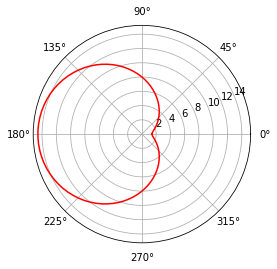

In [ ]:
#problem 1
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
def diff(u,x):
  return (u[1],-u[0]+mu/l**2)  #l=angular momentum
mu=0.5 #taking masses =1
x=np.array([0.5,0.5,0.5,0.5,0.5,0.5])
y=np.array([0.0,0.0,0.0,0.0,0.0,0.5])
v_x=np.array([0.0,0.0,0.0,0.5,-0.5,-0.5])
v_y=np.array([1.63,1.8,1.4,1.8,1.4,0.5])
theta=np.linspace(0,2*np.pi,100)
r=[]
v=[]
s=[]
k=[]
for i in range (0,6):
  p_vec=np.array([x[i],y[i]])   #position vector
  s=(x[i]**2+y[i]**2)**0.5     #magnitude of position vector
  r.append(s)
  v_vec=np.array([v_x[i],v_y[i]]) #velocity vector
  k=(v_x[i]**2+v_y[i]**2)**0.5   #magnitude of velocity
  v.append(k)
  l=np.array(mu*np.cross(p_vec,v_vec)) #m(rXv)
  #l=np.flip(l)
  u_pos=p_vec/s # position unit vector
  r_inv=1/s
  radv=np.dot(u_pos,v_vec)  #radial velocity
  r_velo=-mu*radv/l
  ival=[r_inv,r_velo]
  final=odeint(diff,ival,theta)
  r_ipoint=final[:,0]
  r_plotpoints=1/r_ipoint
plt.polar(theta,1/r_plotpoints,color="red")
plt.savefig("trajectory1.pdf")



In [ ]:
#problem 3


#analytical sol
import numpy as np
import math
import sympy as sp
z=sp.symbols('z')
f=(sp.sin(z))**2/(z**2)
y=sp.integrate(f,(z,-np.inf,np.inf))
print(y)


#numerical sol
import scipy.integrate
import numpy as np
h= lambda x:(np.sin(x)**2)/x**2
s=scipy.integrate.quad(h,-np.inf,np.inf)

print(s[0])

pi
3.1417357698907553


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


In [ ]:
#problem 4
from math import e,cos,sin,pi
from scipy.special import roots_legendre

def f(x):
  return (x**2)*(e**(-x**2))
def s(x):
  return (1+(cos(x))**2)**0.5   #function sin(x)
def g(f,a,b,n):
  e1=0
  roots,weights= roots_legendre(n)
  for i in range(n):
    e1+=(f((((b-a)/2)*(roots[i]))+((b+a)/2)))*(weights[i])
  return e1*((b-a)/2)
#numerical evaluation of 1st function
print(g(f,-1,1,2))
print(g(f,-1,1,3))
print(g(f,-1,1,5))

#numerical analysis of 2nd function
print(g(s,0,pi,2))
print(g(s,0,pi,3))
print(g(s,0,pi,5))


#percentage error
an_sol=3.8202  #analytical solution for s(x)
print("percentage error for 2 point :",abs((g(s,0,pi,2)-an_sol)/an_sol)*100)
print("percentage error for 3 point :",abs((g(s,0,pi,3)-an_sol)/an_sol)*100)
print("percentage error for 5 point :",abs((g(s,0,pi,5)-an_sol)/an_sol)*100)




0.47768754038252614
0.36587442406268444
0.37887323886553764
3.9989762910745297
3.7892054214626487
3.8187923611667065
percentage error for 2 point : 4.679762606003085
percentage error for 3 point : 0.8113339232854591
percentage error for 5 point : 0.03684725494197456
